In [16]:
! pip install pandas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
df = pd.read_csv("housing.csv")

In [19]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [21]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [22]:
df.dtypes

,0
RM,float64
LSTAT,float64
PTRATIO,float64
MEDV,float64


In [23]:
df.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


In [24]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

In [25]:
df.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


In [26]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.drop_duplicates(inplace=True)

In [27]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [30]:
num_columns = df.select_dtypes(include=["int64", "float64", "int32"]).columns

for col in num_columns:
    lower, upper = detect_outliers_iqr(df, col)
    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()
    if outliers_count > 0:
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

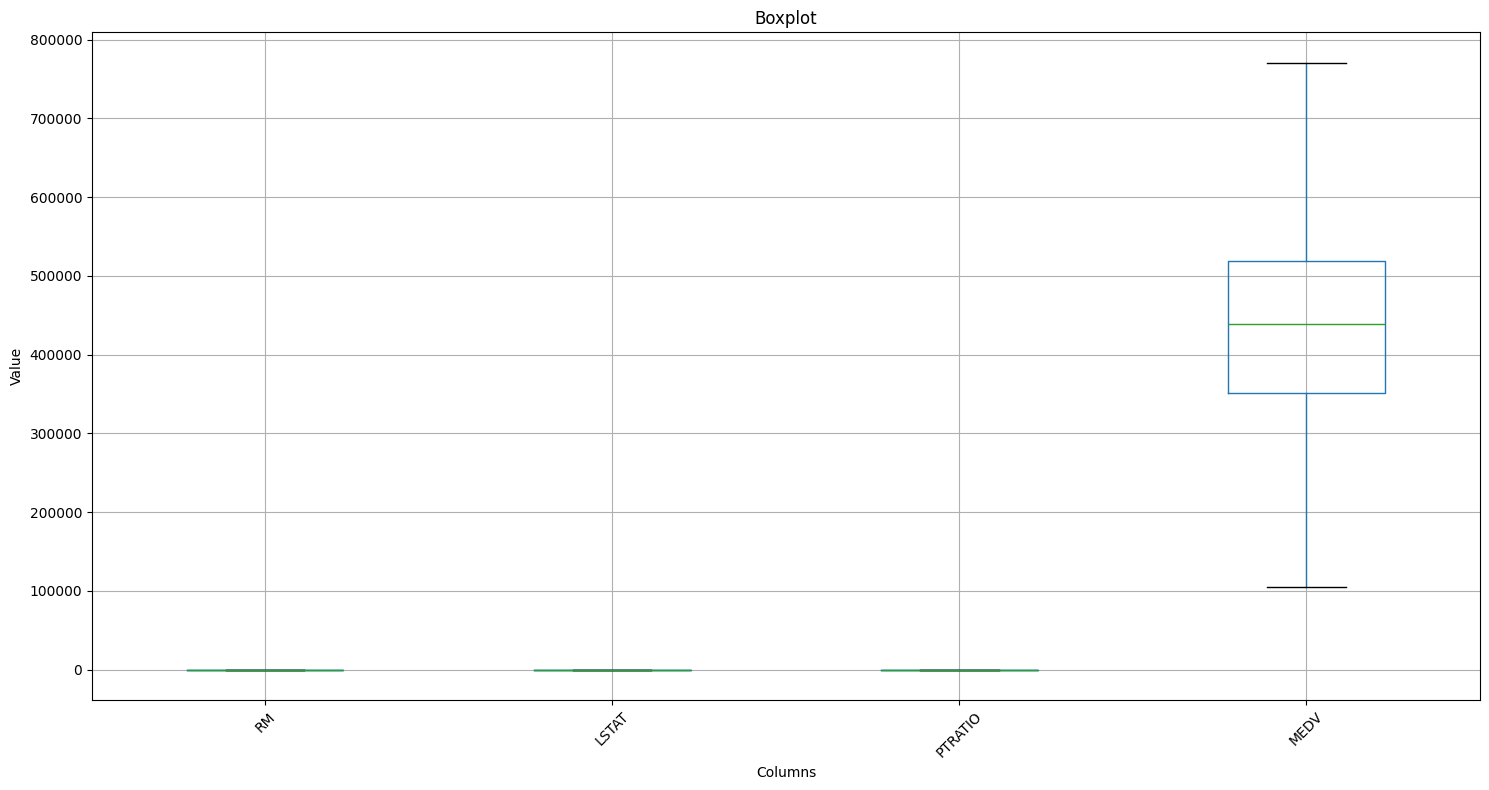

In [31]:
plt.figure(figsize=(15, 8))
df[num_columns].boxplot()
plt.title("Boxplot")
plt.ylabel("Value")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
target_column = 'MEDV'
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")

  RM: 76807.0572
  LSTAT: -11147.5929
  PTRATIO: -17358.4725


In [43]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("\nModel Performance:")
print(f"Training Set - MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Testing Set  - MSE: {mse_test:.4f}, R²: {r2_test:.4f}")



Model Performance:
Training Set - MSE: 6094842309.0930, R²: 0.7424
Testing Set  - MSE: 5172789910.9235, R²: 0.7167


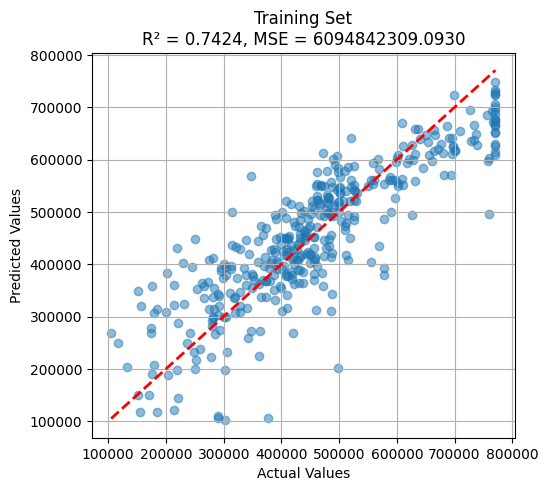

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Training Set\nR² = {r2_train:.4f}, MSE = {mse_train:.4f}")
plt.grid(True)


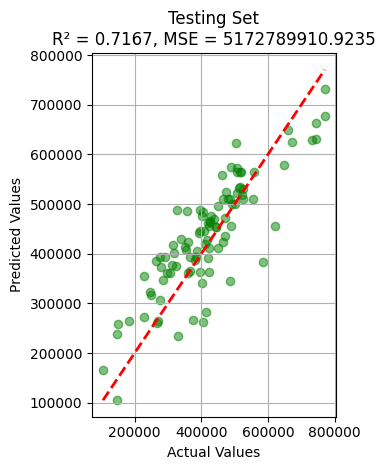

In [41]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Testing Set\nR² = {r2_test:.4f}, MSE = {mse_test:.4f}")
plt.grid(True)

plt.tight_layout()
plt.show()

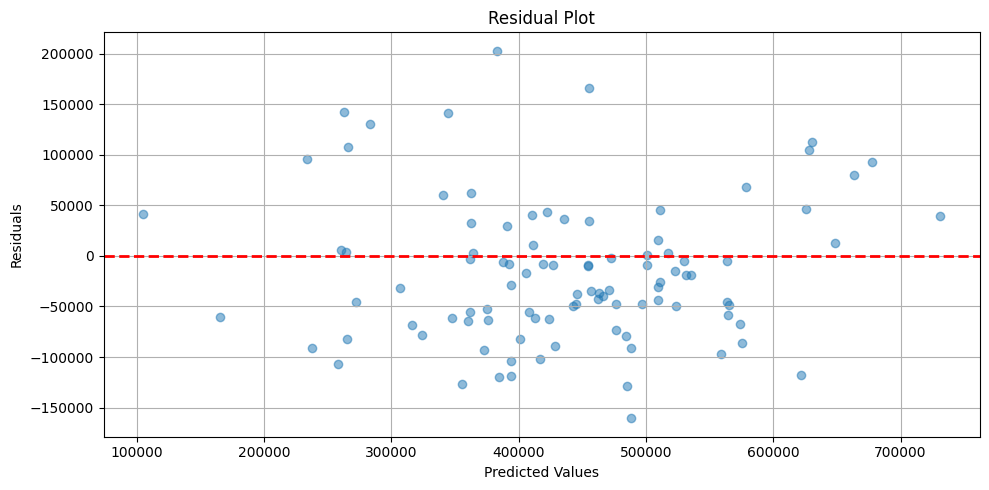

In [42]:
plt.figure(figsize=(10, 5))
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()